<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JosiasRuiz/blob/main/W7_Actividad_Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de dato**
###Tecnológico de Monterrey

# **Actividad W7**
## **Visualización**

####Josías Ruiz - A00968460

#####Dr. María de La Paz Rico

1. Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 
1. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()
1. Limpia los datos eliminando los registros nulos o rellena con la media de la columna
1. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión
1. Realiza el conteo de las variables categóricas
1. Escala los datos, si consideras necesario
1. Reduce las dimensiones con PCA, si consideras necesario.
1. Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
1. Indica la importancia de las variables en cada componente
1. Elabora los histogramas de los atributos para visualizar su distribución
1. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.
1. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

In [1]:
# Importar las librerías de trabajo
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

#### Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí.

In [2]:
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df = pd.read_csv(url)

In [3]:
#Remover columna ID porque no es una variable que afecte la salida
df = df.drop(['ID'], axis=1)

#### Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [4]:
print('-------------Shape-----------')
print(df.shape)
print('-------------Columns-----------')
print(df.columns)
print('-------------Head-----------')
print(df.head())
print('-------------Dtypes-----------')
print(df.dtypes)
print('-------------Info-----------')
print(df.info())
print('-------------ISNA-----------')
print(df.isna())

-------------Shape-----------
(30000, 24)
-------------Columns-----------
Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')
-------------Head-----------
       X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
0   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
1  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
2   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
3   50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
4   50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   

       X16      X17     X18      X19      X20     X21     X22     X23    Y  
0      0.0      0.0     0.0    689.0      0.0     0.0     0.0     0.0  1.0  
1   3455.0   3261.0     0.0   1000.0   1000.0  1000.0     0.0  2000.0  1.0  
2  14948.0  15549.0  1518.

#### Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [5]:
df.dropna(subset=['X2', 'X3', 'X4', 'X5', 'Y'], inplace=True)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [6]:
#Reemplazar nulls con mean
columnsToSubstitute = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
for col in columnsToSubstitute:
  mean = df[col].mean()
  df[col] = df[col].fillna(mean)

In [7]:
#Buscar valores null
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

#### Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [8]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29992.000000,29992.000000,29992.000000,29992.000000,29992.000000,29992.000000,29992.000000,29992.000000,29992.000000,29992.000000,...,29992.000000,29992.000000,29992.000000,29992.000000,2.999200e+04,29992.000000,29992.000000,29992.000000,29992.000000,29992.000000
mean,167486.985863,1.603761,1.853128,1.551881,35.483862,-0.016738,-0.133816,-0.166539,-0.220877,-0.266395,...,43275.245147,40324.351568,38882.735076,5661.062258,5.922150e+03,5225.191277,4827.025846,4799.062198,5216.369757,0.221192
std,129740.096698,0.489123,0.790351,0.521911,9.218114,1.123788,1.197176,1.195926,1.169051,1.133021,...,64335.707591,60798.970358,59558.401600,16559.971904,2.304331e+04,17607.794941,15667.682854,15277.583913,17779.452295,0.415057
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2331.500000,1768.000000,1257.000000,1000.000000,8.360000e+02,390.000000,297.750000,253.750000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19060.500000,18121.500000,17097.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54519.000000,50181.250000,49205.250000,5006.000000,5.000000e+03,4508.500000,4015.000000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


a) La función describe() permite la inspeción rápida de los datos. Esta se enfoca en el análisis de las variables numéricas del DF, no obstante, en este ejercicio el DF tambien considera variables categóricas por lo que hace una trasnformación. 

b) Este análisis rápido de la información extrae varios parámetros estadísticos, como el promedio (mean), la mediana (50% percentil) e incluso calcula las medidas de dispersión [desviación estándar (std) y cudrantes de percentil]. 
Esto nos permite notar facilmente la distribución de cada variable de entrada (features).

#### Realiza el conteo de las variables categóricas

In [9]:
#Copia del df limpio para manipulación
ndf = df.copy()

In [11]:
#Etiquetar cada columna a la refencia de la información para un manejo más claro de la información
columns = ['monto', 'genero', 'educacion', 'estadoCivil', 'edad', 
           'estadoCuenta1', 'estadoCuenta2', 'estadoCuenta3', 'estadoCuenta4','estadoCuenta5', 'estadoCuenta6',
           'saldo1', 'saldo2', 'saldo3', 'saldo4', 'saldo5', 'saldo6',
           'pago1', 'pago2', 'pago3', 'pago4', 'pago5', 'pago6',
           'y']

ndf.columns = columns
ndf.head()

,monto,genero,educacion,estadoCivil,edad,estadoCuenta1,estadoCuenta2,estadoCuenta3,estadoCuenta4,estadoCuenta5,...,saldo4,saldo5,saldo6,pago1,pago2,pago3,pago4,pago5,pago6,y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [12]:
#Buscar Unique por variable
for feature in ndf.columns:
  print(feature,': ',ndf[feature].unique().size,)

monto :  81
genero :  2
educacion :  7
estadoCivil :  4
edad :  56
estadoCuenta1 :  12
estadoCuenta2 :  12
estadoCuenta3 :  12
estadoCuenta4 :  12
estadoCuenta5 :  11
estadoCuenta6 :  11
saldo1 :  22717
saldo2 :  22337
saldo3 :  22019
saldo4 :  21541
saldo5 :  20999
saldo6 :  20598
pago1 :  7940
pago2 :  7899
pago3 :  7517
pago4 :  6937
pago5 :  6895
pago6 :  6939
y :  2


In [18]:
#Separar las variables categoricas de las numéricas
featCat = []
featNum = []
for feature in ndf.columns:
  if ndf[feature].unique().size <= 81:
    featCat.append(feature)
  else:
    featNum.append(feature)
print("Var Categoricas")
featCat

Var Categoricas


['monto',
 'genero',
 'educacion',
 'estadoCivil',
 'edad',
 'estadoCuenta1',
 'estadoCuenta2',
 'estadoCuenta3',
 'estadoCuenta4',
 'estadoCuenta5',
 'estadoCuenta6',
 'y']

#### Reduce las dimensiones con PCA, si consideras necesario.

In [19]:
#Nuevo df para analisis de variables numéricas
dfNum = ndf[featNum]
dfNum.head()

,saldo1,saldo2,saldo3,saldo4,saldo5,saldo6,pago1,pago2,pago3,pago4,pago5,pago6
0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


#### Escala los datos, si consideras necesario

In [21]:
#Scaling para no afectar PCA
dfNumSca = dfNum.apply(zscore)
dfNumSca.head()

,saldo1,saldo2,saldo3,saldo4,saldo5,saldo6,pago1,pago2,pago3,pago4,pago5,pago6
0,-0.642682,-0.647530,-0.668134,-0.672659,-0.663252,-0.652861,-0.341858,-0.227104,-0.296759,-0.308093,-0.314130,-0.293398
1,-0.659398,-0.666876,-0.639396,-0.621800,-0.606424,-0.598108,-0.341858,-0.213608,-0.239965,-0.244266,-0.314130,-0.180907
2,-0.298763,-0.494040,-0.482559,-0.449901,-0.417388,-0.391786,-0.250190,-0.191909,-0.239965,-0.244266,-0.248673,-0.012170
3,-0.057710,-0.013464,0.032665,-0.232554,-0.186936,-0.156752,-0.221083,-0.169386,-0.228607,-0.237884,-0.244157,-0.237152
4,-0.578803,-0.611451,-0.161359,-0.347173,-0.348340,-0.331642,-0.221083,1.334850,0.271180,0.266347,-0.269030,-0.255207


#### Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

In [24]:
from sklearn.decomposition import PCA

#Descomposición en componentes principales (PCA)
pca = PCA(n_components=len(dfNumSca.columns))
pca.fit(dfNumSca)

#Tabla de varianza por componente
pcaSummary = pd.DataFrame({'DevStd': np.sqrt(pca.explained_variance_),
                          'Var': pca.explained_variance_ratio_,
                          'Var Acumulada': np.cumsum(pca.explained_variance_ratio_),
                          'Var Perdida': 1 - np.cumsum(pca.explained_variance_ratio_)}
                          )

pcaSummary
pcaSummary_df = pcaSummary

rowNames = np.array(['PC{}'.format(i) for i in range(1, len(dfNumSca.columns) + 1)])
pcaSummary.index = rowNames
pcaSummary.round(4)

,DevStd,Var,Var Acumulada,Var Perdida
PC1,2.4036,0.4814,0.4814,0.5186
PC2,1.2766,0.1358,0.6172,0.3828
PC3,0.9535,0.0758,0.6930,0.3070
PC4,0.9398,0.0736,0.7666,0.2334
PC5,0.9329,0.0725,0.8391,0.1609
PC6,0.8822,0.0649,0.9040,0.0960
PC7,0.8524,0.0605,0.9645,0.0355
PC8,0.5148,0.0221,0.9866,0.0134
PC9,0.2665,0.0059,0.9925,0.0075
PC10,0.2031,0.0034,0.9959,0.0041


Los primeros 4 componentes nos dan el 76.66% de la información por lo que podemos reducir.

#### Indica la importancia de las variables en cada componente

In [27]:
pcaDec = pd.DataFrame(pca.components_, columns=dfNumSca.columns)
pcaDec.insert(loc=0,column='PC',value=range(1, len(dfNumSca.columns) + 1))
pcaDec

,PC,saldo1,saldo2,saldo3,saldo4,saldo5,saldo6,pago1,pago2,pago3,pago4,pago5,pago6
0,1,0.379042,0.390467,0.395419,0.398519,0.395259,0.387212,0.133529,0.114920,0.125637,0.114328,0.110659,0.101925
1,2,-0.182505,-0.158935,-0.103849,-0.098181,-0.083474,-0.072574,0.423808,0.452739,0.425024,0.372453,0.310655,0.329111
2,3,-0.055310,0.018156,0.057257,0.080014,0.042485,-0.101425,0.366421,0.299823,0.231752,-0.122313,-0.762633,-0.316864
3,4,-0.042048,-0.079456,-0.118106,-0.022748,0.118088,0.149642,-0.202097,-0.161400,0.266890,0.603771,0.073704,-0.658042
4,5,-0.056431,-0.035312,0.095264,0.024900,-0.084998,0.066910,0.065519,0.434235,-0.050666,-0.486071,0.491906,-0.548192
5,6,0.012139,-0.030902,-0.124382,0.125651,-0.004932,0.014971,-0.211921,-0.297766,0.795035,-0.436605,0.055455,0.089641
6,7,0.008472,-0.136299,0.094518,0.038013,0.048587,-0.003446,-0.747527,0.585474,0.057931,0.072591,-0.179746,0.161520
7,8,0.567170,0.385369,0.121173,-0.206135,-0.420847,-0.490847,-0.058256,0.049780,0.141897,0.121023,0.055851,-0.104010
8,9,0.416729,0.036921,-0.485990,-0.522272,0.068978,0.512482,0.047380,0.147096,-0.000741,-0.116460,-0.100070,0.034118
9,10,-0.431571,0.347400,0.494087,-0.489367,-0.250559,0.340674,-0.068595,-0.067466,0.125948,0.002461,-0.067896,0.029725


#### Elabora los histogramas de los atributos para visualizar su distribución

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff852c0a850>,
      dtype=object)

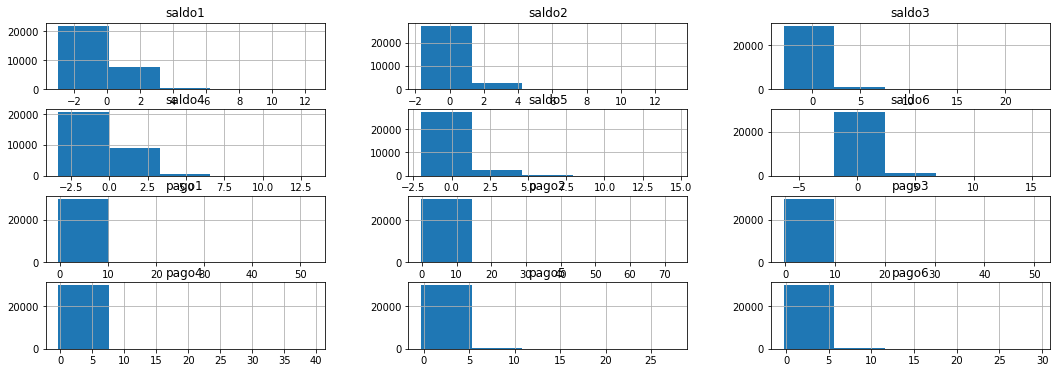

In [28]:
dfNumSca.hist(figsize=(18, 6), bins=5)

#### Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.
#### Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

*BoxPlot*

Muestra la caja y los bigotes para notar la distribucion de los datos. Se observa una distribución sesgada.

Este plot nos muestra que es necesario balancear mejor los datos para ser usados en el entrenamiento de los modelos.

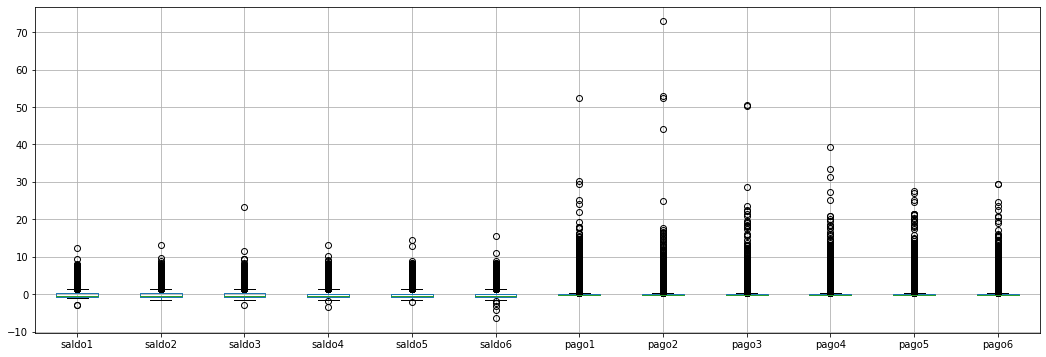

In [30]:
dfNumSca.boxplot(figsize=(18, 6))

*Scree*

Para visualizar la variabilidad y acumulacion de cada compoentne principal se utiliza la gráfica Scree.

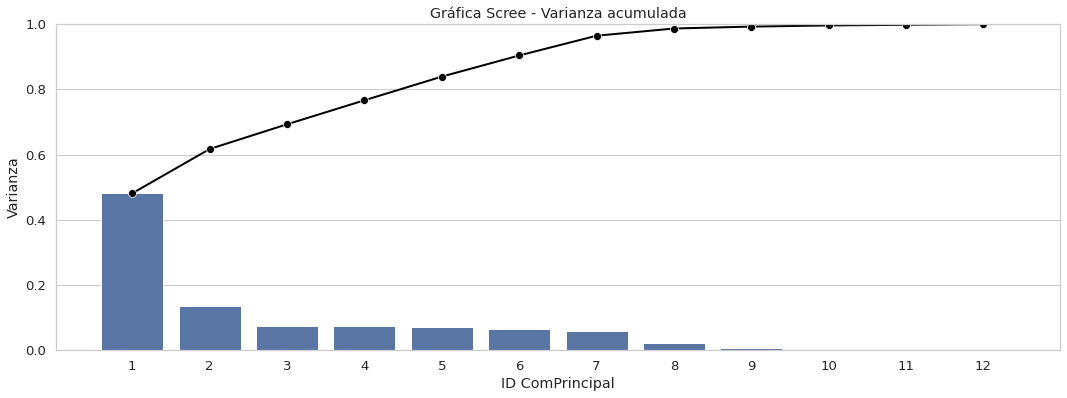

In [32]:
PC_components = np.arange(pca.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid',
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(18, 6))

_ = sns.barplot(x = PC_components,
                y = pca.explained_variance_ratio_,
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1,
                 y = np.cumsum(pca.explained_variance_ratio_),
                 color = 'black',
                 linestyle = '-',
                 linewidth = 2,
                 marker = 'o',
                 markersize = 8
                 )

plt.title('Gráfica Scree - Varianza acumulada')
plt.xlabel('ID ComPrincipal')
plt.ylabel('Varianza')
plt.ylim(0, 1)
plt.show()

*Mapa de Calor (HeatMap)*

Es útil para vizualizar la contribución de cada feature al componente principal. Por ejemplo aquí podemos ver que los feature *saldos* y *pagos* tienen gran contribución en los primeros dos componentes

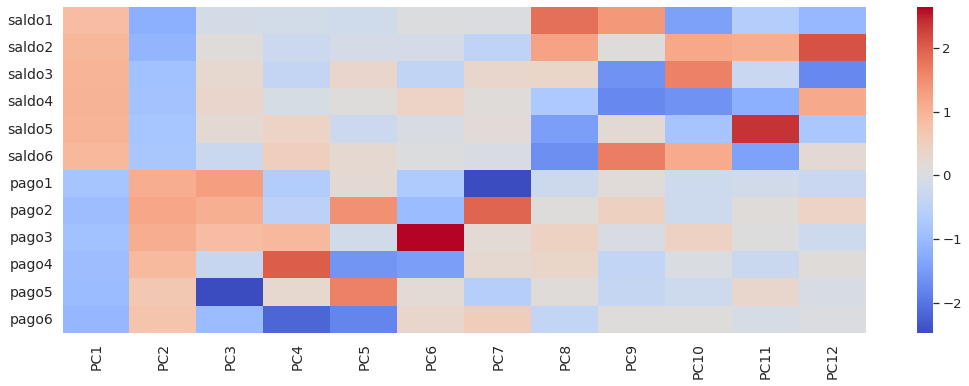

In [33]:
pcaComp_dfX = pd.DataFrame(pca.components_.transpose(), 
                                columns = rowNames,
                                index = dfNumSca.columns
                                )
pcaComp_dfX
pcaComp_dfX_nor=(pcaComp_dfX-pcaComp_dfX.mean())/(pcaComp_dfX.std())

#Para mejor visualizar la contribución de cada dimensión original en cada componente principal, vamos a normalizar los valores de los PC.
pcsComponents_dfX_normalized=(pcaComp_dfX-pcaComp_dfX.mean())/(pcaComp_dfX.std())

ax = sns.heatmap(pcsComponents_dfX_normalized, cmap="coolwarm")
ax.tick_params(labelsize=14)
ax.figure.set_size_inches((18, 6))
plt.show()